# Data Science Project by Itai Schneider

# Can I predict FIFA World Cup 2022 by historical results and historical ranking?

## About me:

### My name is Itai Schneider, second year computer science student at Holon Institute of Technolgoy college. My project is in data science course taught by Dr. Jonathan Scheller.

## What is the project about:

### In my project I am trying to understand if it possible to predict the FIFA Wrold Cup 2022 winner, by predicting outcome for any match planned to take place in this tournament.

## Why did I choose this project:

### For decades, many people have approached gambling agencies in an effort to predict the results of the illustrators and win the grand cash prize.

### There is no doubt that these gamblers, in most cases, know a lot of data about the teams, such as: which team is stronger, which club is richer, history, sports heritage and more.

### In this project I'm trying to predict only by historical sports heritage (historical matches between 1996-2021) and historical ranking (that I will expand on this later)

## In this code:

* In this code I'm going to get the data by web scraping with BeautifulSoup,which be used to retrieve historical FIFA information including: historical ranking and statistics of all FIFA teams since 1992, and matches with outcomes in FIFA World Cups and continental tournament since 1996

* Cleaning ,orginaze and create reference tables.
* EDA visualization which help me understand and analyze the data
* Prediction by using SKlearn.neighbors - KNN machine learning algorithm 

# 01 - Crowling final

## Historical matches:
### This data including the following information for any official tournament un the worlds that has taken place between the years 1996-2021
* Team home
* Away team
* Date
* Score
* Score with penalties (if needed)
* Tournament

### This data is taken from:
* https://en.wikipedia.org/wiki


## Historical ranking:

### FIFA (World Football Association) publish every few month the offical FIFA ranking Teams, this ranking is influenced by the history of victories and achievements over the years for any national team, and increases and decreases accordingly.

### this data including the following information:
### For each ranking published between the years 1993-2022:
* Rank
* Team
* Points - updating ranking points
* ps X month: priviuos ranking X month ago (1<= X <= 5 )
* Update - ranking publish date 

## This data is taken from:
* https://en.fifaranking.net/ranking


In [47]:
import pandas as pd
import numpy as np
import re

from bs4 import BeautifulSoup
import requests
import os
import urllib.parse

In [ ]:
### Setting the historical matchs from Wikipedia's links in urls 

In [ ]:
headermap = {"User-Agent":"Mac Firefox"}

links=["https://en.wikipedia.org/wiki/2018_FIFA_World_Cup#Schedule",'https://en.wikipedia.org/wiki/2014_FIFA_World_Cup','https://en.wikipedia.org/wiki/2010_FIFA_World_Cup',
    'https://en.wikipedia.org/wiki/2006_FIFA_World_Cup','https://en.wikipedia.org/wiki/2002_FIFA_World_Cup','https://en.wikipedia.org/wiki/1998_FIFA_World_Cup',
    'https://en.wikipedia.org/wiki/1994_FIFA_World_Cup','https://en.wikipedia.org/wiki/UEFA_Euro_2020','https://en.wikipedia.org/wiki/UEFA_Euro_2016',
    'https://en.wikipedia.org/wiki/UEFA_Euro_2012','https://en.wikipedia.org/wiki/UEFA_Euro_2008','https://en.wikipedia.org/wiki/UEFA_Euro_2004',
   'https://en.wikipedia.org/wiki/UEFA_Euro_2000','https://en.wikipedia.org/wiki/UEFA_Euro_1996','https://en.wikipedia.org/wiki/2021_Copa_Am%C3%A9rica',
    'https://en.wikipedia.org/wiki/2019_Copa_Am%C3%A9rica','https://en.wikipedia.org/wiki/Copa_Am%C3%A9rica_Centenario','https://en.wikipedia.org/wiki/2015_Copa_Am%C3%A9rica',
    'https://en.wikipedia.org/wiki/2011_Copa_Am%C3%A9rica','https://en.wikipedia.org/wiki/2007_Copa_Am%C3%A9rica','https://en.wikipedia.org/wiki/2004_Copa_Am%C3%A9rica',
    'https://en.wikipedia.org/wiki/2001_Copa_Am%C3%A9rica','https://en.wikipedia.org/wiki/1999_Copa_Am%C3%A9rica','https://en.wikipedia.org/wiki/1997_Copa_Am%C3%A9rica',
    'https://en.wikipedia.org/wiki/1995_Copa_Am%C3%A9rica','https://en.wikipedia.org/wiki/2021_Africa_Cup_of_Nations','https://en.wikipedia.org/wiki/2019_Africa_Cup_of_Nations',
    'https://en.wikipedia.org/wiki/2017_Africa_Cup_of_Nations','https://en.wikipedia.org/wiki/2015_Africa_Cup_of_Nations',
    'https://en.wikipedia.org/wiki/2013_Africa_Cup_of_Nations','https://en.wikipedia.org/wiki/2012_Africa_Cup_of_Nations',
    'https://en.wikipedia.org/wiki/2010_Africa_Cup_of_Nations','https://en.wikipedia.org/wiki/2008_Africa_Cup_of_Nations',
    'https://en.wikipedia.org/wiki/2006_Africa_Cup_of_Nations','https://en.wikipedia.org/wiki/2004_African_Cup_of_Nations',
    'https://en.wikipedia.org/wiki/2002_African_Cup_of_Nations','https://en.wikipedia.org/wiki/2000_African_Cup_of_Nations',
    'https://en.wikipedia.org/wiki/1998_African_Cup_of_Nations','https://en.wikipedia.org/wiki/1996_African_Cup_of_Nations',
    'https://en.wikipedia.org/wiki/2019_AFC_Asian_Cup','https://en.wikipedia.org/wiki/2015_AFC_Asian_Cup',
    'https://en.wikipedia.org/wiki/2011_AFC_Asian_Cup','https://en.wikipedia.org/wiki/2007_AFC_Asian_Cup','https://en.wikipedia.org/wiki/2004_AFC_Asian_Cup',
    'https://en.wikipedia.org/wiki/2000_AFC_Asian_Cup','https://en.wikipedia.org/wiki/1996_AFC_Asian_Cup','https://en.wikipedia.org/wiki/2021_CONCACAF_Gold_Cup',
    'https://en.wikipedia.org/wiki/2019_CONCACAF_Gold_Cup','https://en.wikipedia.org/wiki/2017_CONCACAF_Gold_Cup','https://en.wikipedia.org/wiki/2015_CONCACAF_Gold_Cup',
    'https://en.wikipedia.org/wiki/2013_CONCACAF_Gold_Cup','https://en.wikipedia.org/wiki/2011_CONCACAF_Gold_Cup',
    'https://en.wikipedia.org/wiki/2009_CONCACAF_Gold_Cup','https://en.wikipedia.org/wiki/2007_CONCACAF_Gold_Cup',
    'https://en.wikipedia.org/wiki/2005_CONCACAF_Gold_Cup','https://en.wikipedia.org/wiki/2003_CONCACAF_Gold_Cup',
    'https://en.wikipedia.org/wiki/2002_CONCACAF_Gold_Cup','https://en.wikipedia.org/wiki/2000_CONCACAF_Gold_Cup',
    'https://en.wikipedia.org/wiki/1998_CONCACAF_Gold_Cup','https://en.wikipedia.org/wiki/1996_CONCACAF_Gold_Cup']

In [ ]:
def get_historical_matches_wiki(urls):
    
    date=list()
    home_team=list()
    score=list()
    away_team=list()
    penalties=list()
    tournament=list()
    
    for link in urls:
        
        page = requests.get(link,headers=headermap)
        
        soup = BeautifulSoup(page.content, 'html.parser')
        
        matches = soup("table",attrs={"class":"fevent"})
        dates = soup("div",{'class':'fleft'})
        
        #for dates
        for day in dates:
            date.append(day.find("div",{"class":"fdate"}).get_text().strip())

        #for rest:
        for match in matches:

            cells=match("th")


            home_team.append(cells[0].find('a').get_text())
            try:
                score.append(cells[1].get_text())
            except:
                score.append(cells[1].find('a').get_text())
            away_team.append(cells[2].find('a').get_text())
            tournament.append(link[30:])
            try:
                penalties.append(match("tr",{'class':"fgoals"})[1].th.get_text())
            except:
                penalties.append('-')
        
    df_matches = pd.DataFrame({"Date":date,"Home Team":home_team,"Score":score,"Away Team":away_team,'Penalties':penalties,"Tournamnet":tournament}) 
        
    
    
    
    
    
    
    
    
    return df_matches

In [ ]:
df_matches=get_historical_matches_wiki(links)
df_matches

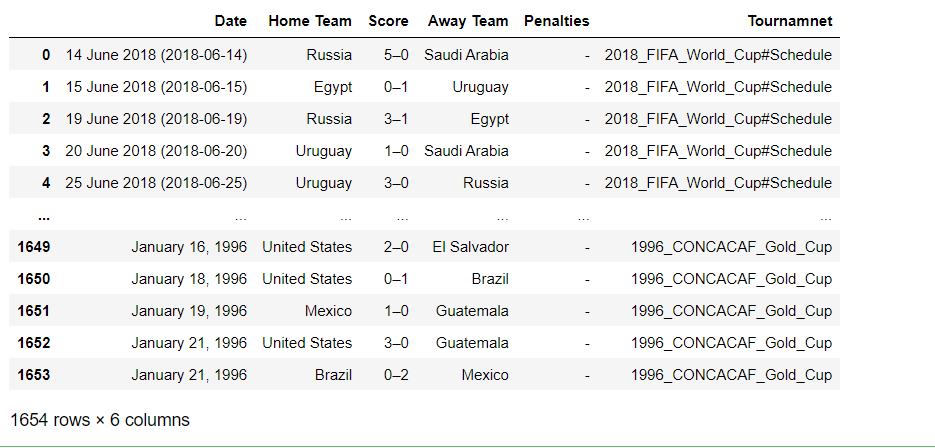

In [ ]:
df_matches.to_csv('data/historical_matches_right2.csv',index=False)

### Getting the historical ranking 1993-2022 from:
###  https://en.fifaranking.net/ranking

In [ ]:
def get_historical_fifa_ranking(curr_link):
    
    
    teams_ranks=list()
    teams_points=list()
    nations_names=list()
    position_before_1_month=list()
    position_before_2_month=list()
    position_before_3_month=list()
    position_before_4_month=list()
    position_before_5_month=list()
    ranking_dates=list()


    for pg in range(315):


        html = requests.get(curr_link,headers=headermap)
        soup = BeautifulSoup(html.content, 'html.parser')

        tables = soup.find("div",{"class":"ranking04"})



        for tbl in tables("table",{"class":"table table-striped table-condensed"}):
            for row in tbl("tr")[1:]:
                cells = row("td")
                if len(cells)<9:
                    continue

                teams_ranks.append(cells[0].get_text())
                teams_points.append(cells[2].get_text())
                nations_names.append(cells[3].find("a").get_text())
                position_before_1_month.append(cells[4].get_text())
                position_before_2_month.append(cells[5].get_text())
                position_before_3_month.append(cells[6].get_text())
                position_before_4_month.append(cells[7].get_text())
                position_before_5_month.append(cells[8].get_text())
                ranking_dates.append(soup.find("time").get_text())


        curr_link='https://en.fifaranking.net/ranking' + soup.find("li", {"class":"previous"}).a["href"][1:]


    df_hist_ranks=pd.DataFrame({'Rank':teams_ranks,'Team':nations_names,'Points':teams_points,'Pst 1 month':position_before_1_month,'Pst 2 month':position_before_2_month,'Pst 3 month':position_before_3_month,'Pst 4 month':position_before_4_month,'Pst 5 month':position_before_5_month,'Update':ranking_dates})

    
    
    
    
    
    

In [ ]:
curr_link='https://en.fifaranking.net/ranking/index.php?d=2022-02-10'
df_ranking=get_historical_fifa_ranking(curr_link)

df_ranking

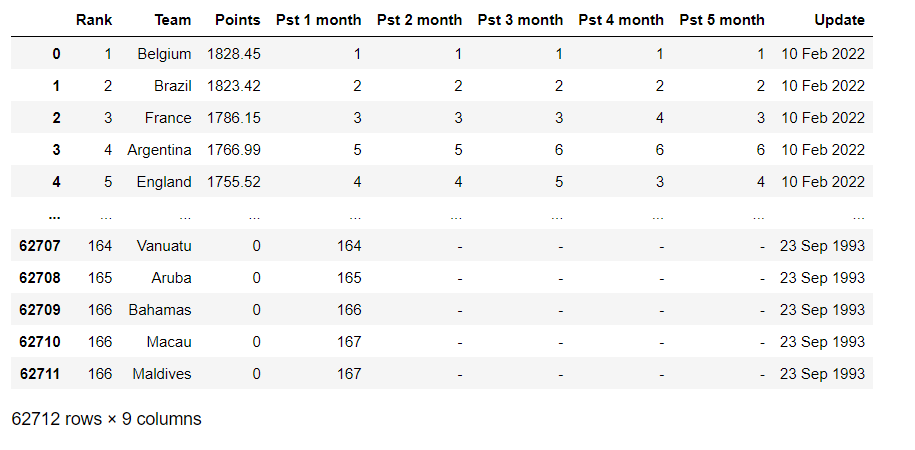

# 02 - Cleaning final

## imports

In [1]:
#imports:
import pandas as pd
import numpy as np
import re

# Auxileries functions

In [2]:
def load_dataset(filename):
    
    df=pd.read_csv(filename)
    
    return df.copy()

In [3]:
def select_rows_by_cell_val(dataframe, col_name, matching_val):
    return dataframe[dataframe[col_name]==matching_val]

## Cleaning matches DataFrame functions:

In [4]:
def split_date(df):
    
    df_clean=df.copy()

    year=list()
    month=list()
    

    year_ptrn="[0-9]{4}"
    month_ptrn="[A-Z]\w+"
    

    for txt in df_clean.Date: 
        try:
            year.append(re.findall(year_ptrn,txt)[0])
            month.append(re.findall(month_ptrn,txt)[0])
            
        except:
            year.append(re.findall(year_ptrn,txt))
            month.append(re.findall(month_ptrn,txt))
   
    df_clean['Year'] = year
    df_clean['Month'] = month
    
    df_clean.drop(['Date'],axis=1,inplace=True)

    return df_clean


In [5]:
def clean_cancelled_matches(df):
    
    df_clean=df.copy()
    df_cancelled=select_rows_by_cell_val(df_clean, 'Score', 'Cancelled')
    for row in df_cancelled.index:
        df_clean.drop(index=row,inplace=True)
    return df_clean

In [6]:
def clean_score(df):
    df_clean=df.copy()
    
    home_score=list()
    away_score=list()
    
    for score in df_clean.Score:
        home_score.append(score[0])
        away_score.append(score[2])
        
    df_clean['Home Score'] = home_score
    df_clean['Away Score'] = away_score
    df_clean.drop(['Score'],axis=1,inplace=True)

    return df_clean

In [7]:
def clean_penalties(df):
    
    df_clean=df.copy()
    home_penal=list()
    away_penal=list()
    
    for panelties in df_clean.Penalties:
        if panelties=='-':
            home_penal.append('-')
            away_penal.append('-')
        else:
            home_penal.append(panelties[0])
            away_penal.append(panelties[2])
    
    
    df_clean['Home Penalties'] = home_penal
    df_clean['Away Penalties'] = away_penal
    df_clean.drop(['Penalties'],axis=1,inplace=True)

    return df_clean

In [8]:
def clean_tournament(df):
    
    df_clean=df.copy()
    
    
    #df_clean.Tournament.replace('#Schedule','')
    df_clean['Tournamnet'] = df_clean['Tournamnet'].str.replace('#Schedule','')
    df_clean['Tournamnet'] = df_clean['Tournamnet'].str.replace('Am%C3%A9rica','')
    df_clean['Tournamnet'] = df_clean['Tournamnet'].str.replace('_',' ')
    #df_clean['Tournament'].replace('Am%C3%A9rica','')
    #df_clean['Tournament'].replace('_',' ')
    
    return df_clean

In [9]:
def creat_result_col(df):
    df_result=df.copy()
    result=list()
    
    for ind in df_result.index:
        
        if df_result['Home Score'][ind]>df_result['Away Score'][ind]:
            result.append('Win')
        elif df_result['Home Score'][ind]<df_result['Away Score'][ind]:
            result.append('Loss')
        else:
            result.append('Draw')
    
    df_result['Result'] = result
    return df_result
        

In [10]:
def creat_result_with_penalties(df):
    
    df_res_pen=df.copy()
    res_pen=list()
    
    for ind in df_res_pen.index:
        
        if df_res_pen['Home Penalties'][ind]=='-':
            res_pen.append('-')
        elif df_res_pen['Home Penalties'][ind]>df_res_pen['Away Penalties'][ind]:
            res_pen.append('Win')
        elif df_res_pen['Home Penalties'][ind]<df_res_pen['Away Penalties'][ind]:
            res_pen.append('Loss')
        
    
    df_res_pen['Result with Penalties'] = res_pen
    return df_res_pen

In [11]:
def get_numeric_month(df):
    df_res=df.copy()
    replace_month={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,
                  'November':11,'December':12}
    df_res.replace(replace_month,inplace=True)
    
    return df_res

In [12]:
def creat_cols_rank_in_matches(df):
    df_copy=df.copy()
    
    df_copy["Home Team Rank"] = None
    df_copy["Away Team Rank"] = None
    
    return df_copy

In [13]:
def rename_countries_matches(df,names_dict):
    df_copy=df.copy()
    
    df_copy["Home Team"].replace(names_dict, inplace=True)
    df_copy["Away Team"].replace(names_dict, inplace=True)
    
    return df_copy

## Exploring and cleaning the data:

In [14]:
filename='data/historical_matches_right2.csv'
df_matches=load_dataset(filename)


In [15]:
df_matches.head()

,Date,Home Team,Score,Away Team,Penalties,Tournamnet
0,14 June 2018 (2018-06-14),Russia,5–0,Saudi Arabia,-,2018_FIFA_World_Cup#Schedule
1,15 June 2018 (2018-06-15),Egypt,0–1,Uruguay,-,2018_FIFA_World_Cup#Schedule
2,19 June 2018 (2018-06-19),Russia,3–1,Egypt,-,2018_FIFA_World_Cup#Schedule
3,20 June 2018 (2018-06-20),Uruguay,1–0,Saudi Arabia,-,2018_FIFA_World_Cup#Schedule
4,25 June 2018 (2018-06-25),Uruguay,3–0,Russia,-,2018_FIFA_World_Cup#Schedule


In [16]:
# lets explore Date column:
for tour in df_matches.Tournamnet.unique():


    print(df_matches.loc[df_matches['Tournamnet'] == tour, 'Date'].iloc[0])

14 June 2018 (2018-06-14)
12 June 2014
26 June 2010
24 June 2006
15 June 2002
27 June 1998
July 2, 1994
11 June 2021 (2021-06-11)
10 June 2016 (2016-06-10)
8 June 2012 (2012-06-08)
7 June 2008 (2008-06-07)
12 June 2004 (2004-06-12)
12 June 2000 (2000-06-12)
8 June 1996 (1996-06-08)
14 June 2021 (2021-06-14)
14 June 2019 (2019-06-14)
3 June 2016 (2016-06-03)
24 June 2015 (2015-06-24)
16 July 2011
26 June 2007
6 July 2004
11 July 2001
29 June 1999
11 June 1997
5 July 1995
9 January 2022 (2022-01-09)
21 June 2019 (2019-06-21)
14 January 2017 (2017-01-14)
31 January 2015
2 February 2013
4 February 2012
10 January 2010
20 January 2008
20 January 2006
24 January 2004
19 January 2002
22 January 2000
7 February 1998
13 January 1996
5 January 2019 (2019-01-05)
22 January 2015
21 January 2011
7 July 2007
17 July 2004
12 October 2000
4 December 1996
10 July 2021 (2021-07-10)
15 June 2019 (2019-06-15)
July 7, 2017 (2017-07-07)
7 July 2015 (2015-07-07)
7 July 2013
June 5, 2011
3 July 2009
6 June 20

In [17]:
#matches df cleaning
df_clean_date=split_date(df_matches)
df_clean_cancel=clean_cancelled_matches(df_clean_date)
df_clean_scr=clean_score(df_clean_cancel)
df_clean_pnlt=clean_penalties(df_clean_scr)
df_clean_tour=clean_tournament(df_clean_pnlt)

#creating columns
df_creat_result=creat_result_col(df_clean_tour)
df_creat_res_pen=creat_result_with_penalties(df_creat_result)
df_matches_month_num=get_numeric_month(df_creat_res_pen)
df_matches_with_nan_rank=creat_cols_rank_in_matches(df_matches_month_num)

#Politicly correcting df_matches countries'names:
names_dict={'FR Yugoslavia':'Serbia','Iran':'IR Iran'}
df_matches_rename_countries=rename_countries_matches(df_matches_with_nan_rank,names_dict)




In [18]:
df_matches_rename_countries.loc[(df_matches_rename_countries['Tournamnet']=='2005 CONCACAF Gold Cup')]

,Home Team,Away Team,Tournamnet,Year,Month,Home Score,Away Score,Home Penalties,Away Penalties,Result,Result with Penalties,Home Team Rank,Away Team Rank
1532,Colombia,Panama,2005 CONCACAF Gold Cup,2005,7,0,1,-,-,Loss,-,None,None
1533,Trinidad and Tobago,Honduras,2005 CONCACAF Gold Cup,2005,7,1,1,-,-,Draw,-,None,None
1534,Panama,Trinidad and Tobago,2005 CONCACAF Gold Cup,2005,7,2,2,-,-,Draw,-,None,None
1535,Honduras,Colombia,2005 CONCACAF Gold Cup,2005,7,2,1,-,-,Win,-,None,None
1536,Colombia,Trinidad and Tobago,2005 CONCACAF Gold Cup,2005,7,2,0,-,-,Win,-,None,None
1537,Honduras,Panama,2005 CONCACAF Gold Cup,2005,7,1,0,-,-,Win,-,None,None
1538,Canada,Costa Rica,2005 CONCACAF Gold Cup,2005,7,0,1,-,-,Loss,-,None,None
1539,Cuba,United States,2005 CONCACAF Gold Cup,[],[],1,4,-,-,Loss,-,None,None
1540,Costa Rica,Cuba,2005 CONCACAF Gold Cup,[],[],3,1,-,-,Win,-,None,None
1541,United States,Canada,2005 CONCACAF Gold Cup,[],[],2,0,-,-,Win,-,None,None


In [19]:
#let's replace mysterious '[]' in year and month 2005 and 7:

    
for ind in range(1539,1544):
        df_matches_rename_countries['Year'][ind]='2005'
        df_matches_rename_countries['Month'][ind]='7'
   



In [20]:
df_matches_rename_countries.loc[(df_matches_rename_countries['Tournamnet']=='2005 CONCACAF Gold Cup')]

,Home Team,Away Team,Tournamnet,Year,Month,Home Score,Away Score,Home Penalties,Away Penalties,Result,Result with Penalties,Home Team Rank,Away Team Rank
1532,Colombia,Panama,2005 CONCACAF Gold Cup,2005,7,0,1,-,-,Loss,-,None,None
1533,Trinidad and Tobago,Honduras,2005 CONCACAF Gold Cup,2005,7,1,1,-,-,Draw,-,None,None
1534,Panama,Trinidad and Tobago,2005 CONCACAF Gold Cup,2005,7,2,2,-,-,Draw,-,None,None
1535,Honduras,Colombia,2005 CONCACAF Gold Cup,2005,7,2,1,-,-,Win,-,None,None
1536,Colombia,Trinidad and Tobago,2005 CONCACAF Gold Cup,2005,7,2,0,-,-,Win,-,None,None
1537,Honduras,Panama,2005 CONCACAF Gold Cup,2005,7,1,0,-,-,Win,-,None,None
1538,Canada,Costa Rica,2005 CONCACAF Gold Cup,2005,7,0,1,-,-,Loss,-,None,None
1539,Cuba,United States,2005 CONCACAF Gold Cup,2005,7,1,4,-,-,Loss,-,None,None
1540,Costa Rica,Cuba,2005 CONCACAF Gold Cup,2005,7,3,1,-,-,Win,-,None,None
1541,United States,Canada,2005 CONCACAF Gold Cup,2005,7,2,0,-,-,Win,-,None,None


In [41]:
df_matches_rename_countries.to_csv('Cleaning\cleaning_final\df_matches_rename_countries26062022.csv',index=False)

## Creating Statistics DataFrame
### Representing :rank, rank points,wins,losses,draws for every FIFA national team in the world per month between 2022-1992

## Creating statistics DataFrame functions:

In [22]:
def creat_df_stat_per_team_year_month(df):
    df_copy=df.copy()
    
    #creating all-teams list:
    Teams=list()
    for team in df_copy['Home Team']:
        Teams.append(team)
    for team in df_copy['Away Team']:
        Teams.append(team)    
    
    #remove duplicates:
    Teams = list( dict.fromkeys(Teams))
    
    team_to_df=list()
    rank_to_fd=list()
    avg_rank=list()
    year_to_df=list()
    month_to_df=list()
    mp=list()
    w=list()
    l=list()
    d=list()
    points=list()
    #initilize:
    for team in Teams:
        for year in range(2022, 1991, -1):
            for month in range(12,0,-1):
                team_to_df.append(team)
                year_to_df.append(year)
                month_to_df.append(month)
                mp.append(0)
                w.append(0)
                l.append(0)
                d.append(0)
                rank_to_fd.append(0)
                avg_rank.append(0)
                points.append(0.0)
                
    
            
    df_new=pd.DataFrame({'Team':team_to_df,'Rank':rank_to_fd,'AVG Rank':avg_rank,"Points":points,'Year':year_to_df,'Month':month_to_df,'MP':mp,'W':w,'L':l,'D':d})
    
    
    return df_new
###

#remove dupicates from list credit: "https://www.w3schools.com/python/python_howto_remove_duplicates.asp"

In [23]:
def fill_mpwld(df_matches,df_stats):
    
    df_stats_copy=df_stats.copy()
    
     
    for _,row in df_matches.iterrows():
        
        year_of_match=int(row['Year'])
        month_of_match=row['Month']
        
        
        if row['Result']=='Win':
            winner=row['Home Team']
            loser=row['Away Team']
            
            
            df_stats_copy.loc[((df_stats_copy['Team']==winner)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'W')] += 1
            
            df_stats_copy.loc[((df_stats_copy['Team']==winner)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'MP')] += 1
            
            df_stats_copy.loc[((df_stats_copy['Team']==loser)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'L')] += 1
            
            df_stats_copy.loc[((df_stats_copy['Team']==loser)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'MP')] += 1                   
       
        
        if row['Result']=='Loss':
            winner=row['Away Team']
            loser=row['Home Team']
            
            
            df_stats_copy.loc[((df_stats_copy['Team']==winner)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'W')] += 1
            
            df_stats_copy.loc[((df_stats_copy['Team']==winner)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'MP')] += 1
            
            df_stats_copy.loc[((df_stats_copy['Team']==loser)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'L')] += 1
            
            df_stats_copy.loc[((df_stats_copy['Team']==loser)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'MP')] += 1    
    
        if row['Result']=='Draw':
            winner=row['Home Team']
            loser=row['Away Team']
            
            
            df_stats_copy.loc[((df_stats_copy['Team']==winner)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'D')] += 1
            
            df_stats_copy.loc[((df_stats_copy['Team']==winner)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'MP')] += 1
            
            df_stats_copy.loc[((df_stats_copy['Team']==loser)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'D')] += 1
            
            df_stats_copy.loc[((df_stats_copy['Team']==loser)&(df_stats_copy['Year']==year_of_match)&
                               (df_stats_copy['Month']==month_of_match),'MP')] += 1
    
            
        

                    
                    
    return df_stats_copy

In [24]:
#df_stat
df_stat_year_month=creat_df_stat_per_team_year_month(df_matches_month_num)
df_stat_fill_mpwld=fill_mpwld(df_matches_rename_countries,df_stat_year_month)

In [42]:
df_stat_fill_mpwld.to_csv('Cleaning\cleaning_final\df_stat_fill_mpwld26062022.csv',index=False)

In [155]:
df_stat_fill_mpwld.loc[(df_stat_fill_mpwld['MP']!=0)]

,Team,Rank,AVG Rank,Points,Year,Month,MP,W,L,D
18,Russia,0,0,0.0,2021,6,3,1,2,0
53,Russia,0,0,0.0,2018,7,2,0,0,2
54,Russia,0,0,0.0,2018,6,3,2,1,0
78,Russia,0,0,0.0,2016,6,3,0,2,1
102,Russia,0,0,0.0,2014,6,3,0,1,2
...,...,...,...,...,...,...,...,...,...,...
50262,Guyana,0,0,0.0,2019,6,3,0,2,1
50657,French Guiana,0,0,0.0,2017,7,3,0,3,0
51077,Belize,0,0,0.0,2013,7,3,0,3,0
51659,Saint Vincent and the Grenadines,0,0,0.0,1996,1,2,0,2,0


## Ranking DataFrame functions:

In [26]:
def split_date_ranking(df):
    
    df_clean=df.copy()

    year=list()
    month=list()
    
    year_ptrn="\d{4}"
    month_ptrn="[A-Z]\w+"

    for txt in df_clean.Date:
        
        year.append(re.findall(year_ptrn,txt))
        
        month.append(re.findall(month_ptrn,txt))
            
    df_clean['Year'] = year
    df_clean['Month'] = month
    
    df_clean['Year'] = df_clean['Year'].str.join(',')
    df_clean['Month'] = df_clean['Month'].str.join(',')
    
    df_clean.drop(['Date'],axis=1,inplace=True)

    return df_clean

       

In [27]:
def get_numeric_month_ranking(df):
    df_res=df.copy()
    replace_month={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,
                  'Nov':11,'Dec':12}
    df_res.replace(replace_month,inplace=True)
    
    return df_res

In [28]:
#earese first "whitespace" char for every team name in df_ranking

def fix_team_and_year_ranking(df_ranking):
    df_copy=df_ranking.copy()
    
    
    for row in df_copy.index:
    
        df_copy['Team'][row]=df_copy['Team'][row][1:]
        df_copy['Year'][row]=int(df_copy['Year'][row])
        
        for col in df_copy.iloc[:,3:8]:
            
            if df_copy[col][row]!='-':
                df_copy[col][row]=int(df_copy[col][row])
            
            
    
        
        
        
        
        
    return df_copy

In [29]:
def rename_countries_ranking(df,names_dict):
    df_copy=df.copy()
    
    df_copy["Team"].replace(names_dict, inplace=True)
    
    return df_copy

## Cleaning Ranking DataFrame

In [30]:
#loading the ranking data:
filename2='data/hist_ranking_2022_1993.csv'
df_ranking=load_dataset(filename2)
#rename 'Update' column to 'Date':
df_ranking.rename(columns={'Update':'Date'},inplace=True)
#exctracting year and month from Date and removing Date column:
df_ranking_clean_date=split_date_ranking(df_ranking)
#converting month col from nominal into ineteger ordinal:
df_ranking_num_mon=get_numeric_month_ranking(df_ranking_clean_date)
#earsing first white space char in Team column and convert previous ranks into integers:
df_ranking_fix_name=fix_team_and_year_ranking(df_ranking_num_mon)


C:\Users\97252\AppData\Local\Temp/ipykernel_13540/2559191032.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Team'][row]=df_copy['Team'][row][1:]
C:\Users\97252\AppData\Local\Temp/ipykernel_13540/2559191032.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Year'][row]=int(df_copy['Year'][row])
C:\Users\97252\AppData\Local\Temp/ipykernel_13540/2559191032.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co

In [31]:
#Politicly correcting Countries' names:
names_dict2={'Yugoslavia':'Serbia','Serbia and Montenegro':'Serbia','Serbia':'Serbia','Korea Republic':'South Korea'
             ,'Korea DPR':'North korea','USA':'United States',"C_te d'Ivoire":'Ivory Coast'
             ,"Côte d'Ivoire":'Ivory Coast',"Cote d'Ivoire":'Ivory Coast','Congo DR':"DR Congo",
            "FYR Macedonia":'North Macedonia',"Kyrgyz Republic":"Kyrgyzstan","Cape Verde Islands":"Cape Verde",
            "St Vincent and the Grenadines":"Saint Vincent and the Grenadines"}
df_ranking_rename_teams=rename_countries_ranking(df_ranking_fix_name,names_dict2)

#df_ranking_rename_teams was df_ranking_fix_name3

In [43]:
df_ranking_rename_teams.to_csv('Cleaning\cleaning_final\df_ranking_rename_teams26062022.csv',index=False)

In [158]:
df_ranking_rename_teams.head()

,Rank,Team,Points,Pst 1 month,Pst 2 month,Pst 3 month,Pst 4 month,Pst 5 month,Year,Month
0,1,Belgium,1828.45,1,1,1,1,1,2022,2
1,2,Brazil,1823.42,2,2,2,2,2,2022,2
2,3,France,1786.15,3,3,3,4,3,2022,2
3,4,Argentina,1766.99,5,5,6,6,6,2022,2
4,5,England,1755.52,4,4,5,3,4,2022,2


# Creating final matches DataFrame
# next process uses 2 functions:
## get_rankings
* df - ranking teams DataFrame
* home_team
* away_team
* year - get ranking for teams by year

### This function return a dictionary includes:
* mean ranking place and mean ranking poin for each teams by 'year'

## get_win_draw_prec
* df - ranking teams DataFrame
* home_team
* away_team
* year - get ranking for teams by year
* past - int,for getting the mean ranking for last "past" years (year-past) , for example for year = 2018, past=4,function return mean ranking beetween 2014-2017

### This function return a dictionary includes: 
* win_percentage,draw_percentage for each team calculated by wins sum sivided by matches played sum between 'year' to (year-past).
* In addition, function return differance beetween win/draw precentage by team, and difference of win precentage to draw precentage for each team.

In [33]:
def get_rankings(df,home_team,away_team,year):
    
    ranking_home_team= df.loc[(df['Team']==home_team) & (df['Year']==year) ,'Rank'].mean()

    ranking_away_team=df.loc[(df['Team']==away_team) & (df['Year']==year) ,'Rank'].mean()

    points_home_team=df.loc[(df['Team']==home_team) & (df['Year']==year) ,'Points'].mean()

    points_away_team=df.loc[(df['Team']==away_team) & (df['Year']==year) ,'Points'].mean()


    return {'ranking_home_team': ranking_home_team,
        'ranking_away_team': ranking_away_team,
        'points_home_team':points_home_team,
        'points_away_team':points_away_team}
    

In [46]:
def win_draw_percentage(df,home_team,away_team,year,past):
    
    win_percentage_home_team=(df.loc[(df['Team']==home_team) & (df['Year']<year) & (df['Year']>=(year-past)),'W'].sum())/((df.loc[(df['Team']==home_team) & (df['Year']<year) & (df['Year']>=(year-past)),'MP'].sum()+0.001))
            
    
    win_percentage_away_team=(df.loc[(df['Team']==away_team) & (df['Year']<year) & (df['Year']>=(year-past)),'W'].sum())/((df.loc[(df['Team']==away_team) & (df['Year']<year) & (df['Year']>=(year-past)),'MP'].sum()+0.001))
    
    diff_win_percentage=(win_percentage_home_team-win_percentage_away_team)
    
    draw_percentage_home_team=(df.loc[(df['Team']==home_team) & (df['Year']<year) & (df['Year']>=(year-past)),'D'].sum())/((df.loc[(df['Team']==home_team) & (df['Year']<year) & (df['Year']>=(year-past)),'MP'].sum()+0.001))
    
    draw_percentage_away_team=(df.loc[(df['Team']==away_team) & (df['Year']<year) & (df['Year']>=(year-past)),'D'].sum())/((df.loc[(df['Team']==away_team) & (df['Year']<year) & (df['Year']>=(year-past)),'MP'].sum()+0.001))
    
    diff_draw_percentage=draw_percentage_home_team-draw_percentage_away_team
    
    diff_win_draw_home_team=win_percentage_home_team-draw_percentage_home_team
    diff_win_draw_away_team=win_percentage_away_team-draw_percentage_away_team

       
    return {
        'win_percentage_home_team': win_percentage_home_team,
        'win_percentage_away_team': win_percentage_away_team,
        'diff_win_percentage':diff_win_percentage,
        
        'draw_percentage_home_team': draw_percentage_home_team,
        'draw_percentage_away_team': draw_percentage_away_team,
        'diff_draw_percentage': diff_draw_percentage,
        'diff_win_draw_home_team':diff_win_draw_home_team,
        'diff_win_draw_away_team':diff_win_draw_away_team
    }

## Creating final matches DataFrame

In [122]:
#creat df with ranking,points,win and draw precantage for both teams per every match:
worldcup_list = []

for _,row in df_matches_rename_countries.iterrows():
    worldcup_dict={}
    
    year=row['Year']
    home_team=row['Home Team']
    away_team=row['Away Team']
    
    rankings=get_rankings(df_ranking_rename_teams,home_team,away_team,int(year))
    win_draw_percentages=win_draw_percentage(df_stat_fill_mpwld,home_team,away_team,int(year),4)
    
    worldcup_dict['Year']=int(row['Year'])
    worldcup_dict['Home Team']=home_team
    worldcup_dict['Away Team']=away_team
    
    try:
        worldcup_dict['ranking_home_team']=int(rankings['ranking_home_team'])
        worldcup_dict['ranking_away_team']=int(rankings['ranking_away_team'])
        worldcup_dict['Diff Ranking']=int(rankings['ranking_away_team']-rankings['ranking_home_team'])
    except:
        worldcup_dict['ranking_home_team']=rankings['ranking_home_team']
        worldcup_dict['ranking_away_team']=rankings['ranking_away_team']
        worldcup_dict['Diff Ranking']=rankings['ranking_away_team']-rankings['ranking_home_team']

        
    worldcup_dict['Win_perc_home_team']=win_draw_percentages['win_percentage_home_team']
    worldcup_dict['Win_perc_away_team']=win_draw_percentages['win_percentage_away_team']
    worldcup_dict['Diff_win_perc']=win_draw_percentages['diff_win_percentage']
    
    worldcup_dict['Draw_perc_home_team']=win_draw_percentages['draw_percentage_home_team']
    worldcup_dict['Draw_perc_away_team']=win_draw_percentages['draw_percentage_away_team']
    worldcup_dict['Diff_draw_perc']=win_draw_percentages['diff_draw_percentage']
    
    worldcup_dict['Diff_W_D_home_team']=win_draw_percentages['diff_win_draw_home_team']
    worldcup_dict['Diff_W_D_away_team']=win_draw_percentages['diff_win_draw_away_team']
    
    
    worldcup_dict['points_home_team']=rankings['points_home_team']
    worldcup_dict['points_away_team']=rankings['points_away_team']
    
    
    
    
    worldcup_dict['Tournamnet']=row['Tournamnet']
    worldcup_dict['Result']=row['Result']
    worldcup_dict['Result with Penalties']=row['Result with Penalties']
    
    
      
    
        
    worldcup_list.append(worldcup_dict)
    
df_worldcup = pd.DataFrame(worldcup_list)

df_worldcup

,Year,Home Team,Away Team,ranking_home_team,ranking_away_team,Diff Ranking,Win_perc_home_team,Win_perc_away_team,Diff_win_perc,Draw_perc_home_team,Draw_perc_away_team,Diff_draw_perc,Diff_W_D_home_team,Diff_W_D_away_team,points_home_team,points_away_team,Tournamnet,Result,Result with Penalties
0,2018,Russia,Saudi Arabia,56.0,68.0,12.0,0.000000,0.000000,0.000000,0.499917,0.000000,0.499917,-0.499917,0.000000,923.272727,871.545455,2018 FIFA World Cup,Win,-
1,2018,Egypt,Uruguay,50.0,13.0,-37.0,0.499917,0.374953,0.124964,0.333278,0.000000,0.333278,0.166639,0.374953,998.909091,1258.454545,2018 FIFA World Cup,Loss,-
2,2018,Russia,Egypt,56.0,50.0,-6.0,0.000000,0.499917,-0.499917,0.499917,0.333278,0.166639,-0.499917,0.166639,923.272727,998.909091,2018 FIFA World Cup,Win,-
3,2018,Uruguay,Saudi Arabia,13.0,68.0,55.0,0.374953,0.000000,0.374953,0.000000,0.000000,0.000000,0.374953,0.000000,1258.454545,871.545455,2018 FIFA World Cup,Win,-
4,2018,Uruguay,Russia,13.0,56.0,43.0,0.374953,0.000000,0.374953,0.000000,0.499917,-0.499917,0.374953,-0.499917,1258.454545,923.272727,2018 FIFA World Cup,Win,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,1996,United States,El Salvador,17.0,71.0,54.0,0.285673,0.000000,0.285673,0.142837,0.000000,0.142837,0.142837,0.000000,52.600000,31.400000,1996 CONCACAF Gold Cup,Win,-
1647,1996,United States,Brazil,17.0,1.0,-16.0,0.285673,0.699930,-0.414257,0.142837,0.299970,-0.157133,0.142837,0.399960,52.600000,68.300000,1996 CONCACAF Gold Cup,Loss,-
1648,1996,Mexico,Guatemala,12.0,112.0,100.0,0.199960,0.000000,0.199960,0.599880,0.000000,0.599880,-0.399920,0.000000,54.300000,19.200000,1996 CONCACAF Gold Cup,Win,-
1649,1996,United States,Guatemala,17.0,112.0,95.0,0.285673,0.000000,0.285673,0.142837,0.000000,0.142837,0.142837,0.000000,52.600000,19.200000,1996 CONCACAF Gold Cup,Win,-


In [36]:
#rounding values in df_worldcup
df_worldcup=df_worldcup.round(3)

In [124]:
#remove null rows in df_worldcup:
df_worldcup=df_worldcup.dropna(axis=0).copy()

In [168]:
df_worldcup.isnull().sum()

Year                     0
Home Team                0
Away Team                0
ranking_home_team        0
ranking_away_team        0
Diff Ranking             0
Win_perc_home_team       0
Win_perc_away_team       0
Diff_win_perc            0
Draw_perc_home_team      0
Draw_perc_away_team      0
Diff_draw_perc           0
Diff_W_D_home_team       0
Diff_W_D_away_team       0
points_home_team         0
points_away_team         0
Tournamnet               0
Result                   0
Result with Penalties    0
dtype: int64

In [125]:
df_worldcup.to_csv('Cleaning\cleaning_final\df_worldcup_clean29062022.csv',index=False)

In [126]:
df_worldcup_clean

,Year,Home Team,Away Team,ranking_home_team,ranking_away_team,Diff Ranking,Win_perc_home_team,Win_perc_away_team,Diff_win_perc,Draw_perc_home_team,Draw_perc_away_team,Diff_draw_perc,Diff_W_D_home_team,Diff_W_D_away_team,points_home_team,points_away_team,Tournamnet,Result,Result with Penalties
0,2018,Russia,Saudi Arabia,56.0,68.0,12.0,0.000,0.000,0.000,0.500,0.000,0.500,-0.500,0.000,923.273,871.545,2018 FIFA World Cup,Win,-
1,2018,Egypt,Uruguay,50.0,13.0,-37.0,0.500,0.375,0.125,0.333,0.000,0.333,0.167,0.375,998.909,1258.455,2018 FIFA World Cup,Loss,-
2,2018,Russia,Egypt,56.0,50.0,-6.0,0.000,0.500,-0.500,0.500,0.333,0.167,-0.500,0.167,923.273,998.909,2018 FIFA World Cup,Win,-
3,2018,Uruguay,Saudi Arabia,13.0,68.0,55.0,0.375,0.000,0.375,0.000,0.000,0.000,0.375,0.000,1258.455,871.545,2018 FIFA World Cup,Win,-
4,2018,Uruguay,Russia,13.0,56.0,43.0,0.375,0.000,0.375,0.000,0.500,-0.500,0.375,-0.500,1258.455,923.273,2018 FIFA World Cup,Win,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,1996,United States,El Salvador,17.0,71.0,54.0,0.286,0.000,0.286,0.143,0.000,0.143,0.143,0.000,52.600,31.400,1996 CONCACAF Gold Cup,Win,-
1647,1996,United States,Brazil,17.0,1.0,-16.0,0.286,0.700,-0.414,0.143,0.300,-0.157,0.143,0.400,52.600,68.300,1996 CONCACAF Gold Cup,Loss,-
1648,1996,Mexico,Guatemala,12.0,112.0,100.0,0.200,0.000,0.200,0.600,0.000,0.600,-0.400,0.000,54.300,19.200,1996 CONCACAF Gold Cup,Win,-
1649,1996,United States,Guatemala,17.0,112.0,95.0,0.286,0.000,0.286,0.143,0.000,0.143,0.143,0.000,52.600,19.200,1996 CONCACAF Gold Cup,Win,-


# So lovlely..

# 03 - EDA

### In this section I'm trying to understand the data better, there's nothing ain't a good graph for it.

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### This pie chart graph ,shows the 'Result' column by number of instances per result

* Win - represents winning for home team
* Loss- represent winning for away team 
* Draw - represent a draw between the teams. (wins by penalties are not involved)

### As we can see there is a good advantage for the Win result, well usual local matches as league or qualifying matches, there is an advantage for the local team with its crowd and well knoen stadium. But in our case, when all matches are played in a neutral contry and a neutral stadium - this fact is interesting, especially when the home/away team have been determined randomaly.

<AxesSubplot:ylabel='Result'>

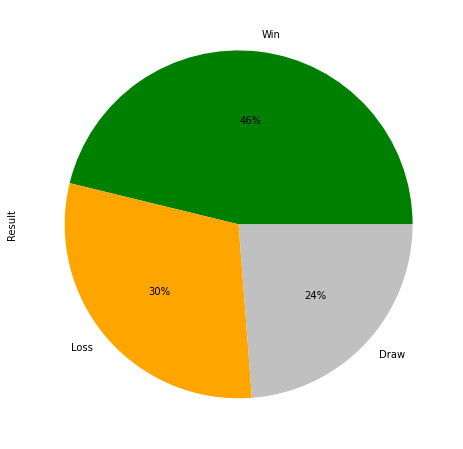

In [127]:
colors = ['green', 'orange', 'silver']
df_worldcup['Result'].value_counts().plot(kind='pie', y='Distribution of results',autopct='%1.0f%%',colors=colors,figsize=(15,8))
#credit: https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/

In [128]:
df_worldcup['Result'].value_counts()

Win     740
Loss    481
Draw    381
Name: Result, dtype: int64

In [129]:
ct1=pd.crosstab(df_worldcup['Year'],df_worldcup['Result'])
ct1.head()

Result,Draw,Loss,Win
Year,,,
1994,3,5,8
1995,7,0,19
1996,20,25,54
1997,4,3,19
1998,13,14,31


In [130]:
ct2=pd.crosstab(df_worldcup['Tournamnet'],df_worldcup['Result'])
ct2.head()

Result,Draw,Loss,Win
Tournamnet,,,
1994 FIFA World Cup,3,5,8
1995 Copa,7,0,19
1996 AFC Asian Cup,5,7,14
1996 African Cup of Nations,4,4,21
1996 CONCACAF Gold Cup,0,4,9


### Again we can see in every year and tournament, that the team which had chossen to be the "home" team won, in most cases.

Text(0, 0.5, 'Amount of result')

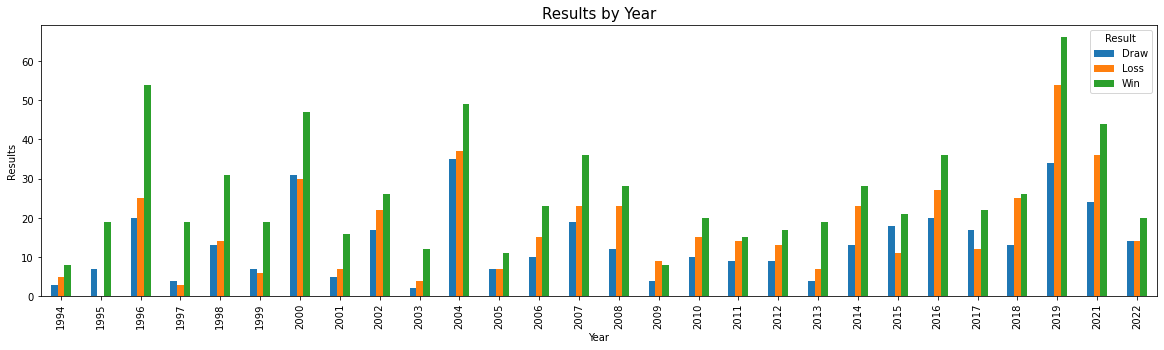

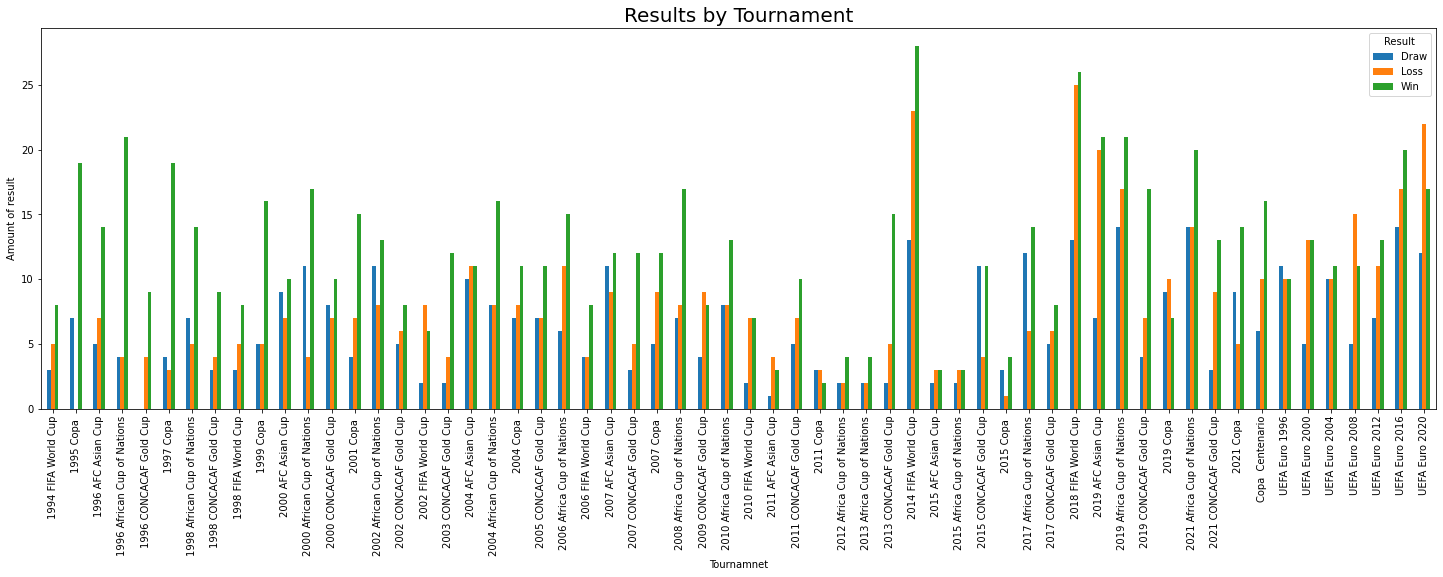

In [131]:
ct1.plot(kind='bar',figsize=(20,5))
plt.title('Results by Year',fontsize=15)
plt.xlabel('Year')
plt.ylabel('Results')

ct2.plot(kind='bar',figsize=(25,7))
plt.title('Results by Tournament',fontsize=20)
plt.xlabel('Tournamnet')
plt.ylabel('Amount of result')

###  As we can see, home teams has better avarage ranking placing:

In [160]:
df_worldcup['ranking_home_team'].mean()

36.835205992509366

In [161]:
df_worldcup['ranking_away_team'].mean()

45.70411985018727

### As we can see, over the years both home and away teams' ranking points increase consistently.

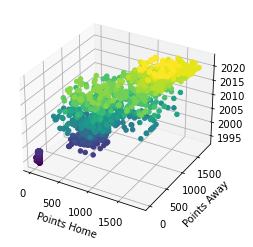

In [132]:
from mpl_toolkits.mplot3d import Axes3D
ax= plt.axes(projection='3d')

xdata=df_worldcup.points_home_team 
ydata=df_worldcup.points_away_team
zdata=df_worldcup.Year

plt.xlabel('Points Home')
plt.ylabel('Points Away')
ax.scatter3D(xdata,ydata,zdata,c=zdata, depthshade=False)

## Unfortunately, I have not been able to analyze the 'Home advantage' phenomenon to the end, at the moment, and I plan to analyze it later.

### Let's check the most frequant home and away teams which had won in a FIFA World Cup match over the years:

In [162]:
def get_frequent_elements(df, col_name, num_top_elements):
    return df[col_name].value_counts()[:num_top_elements]

In [163]:
freq_home_team = get_frequent_elements(df_worldcup[:208].loc[(df_worldcup['Result']=='Win')], 'Home Team', 10)
freq_home_team

Germany        12
Brazil         11
France          9
Netherlands     7
Belgium         7
Argentina       6
Uruguay         5
Italy           4
Portugal        3
Colombia        3
Name: Home Team, dtype: int64

In [164]:
freq_away_team = get_frequent_elements(df_worldcup[:208].loc[df_worldcup['Result']=='Loss'], 'Away Team', 10)
freq_away_team

Croatia        6
Brazil         6
France         6
Spain          5
Germany        5
Italy          4
Netherlands    4
Turkey         3
Mexico         3
England        3
Name: Away Team, dtype: int64

<AxesSubplot:ylabel='Home Team'>

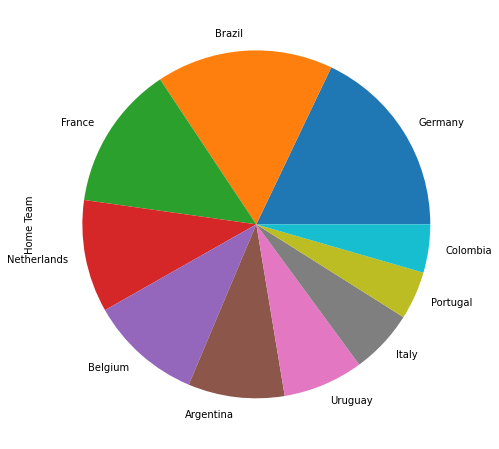

In [165]:
freq_home_team.plot(kind='pie',y='Top Home winners',figsize=(15,8))

<AxesSubplot:ylabel='Away Team'>

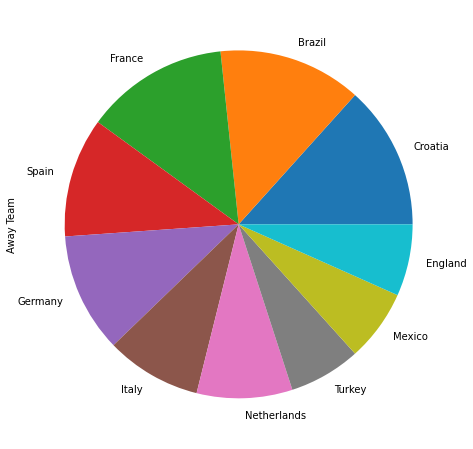

In [166]:
freq_away_team.plot(kind='pie',y='Top Away winners',figsize=(15,8))

## It's seem's like one of these team will win FIFA World Cup 2022..
## We'll wait and see..

# 04 - Machine learning

### I choose to use the SKlearn KNN algotithm, which provide a multi-option prediction a I need (Win/Loss/Draw).
### In this section I'll train and test the world cup DataFrame which includes historical mathces its outcome over the years. 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [133]:
 
features=['Diff Ranking',
          'Diff_win_perc',
          'Diff_draw_perc',
          'Diff_W_D_home_team','Diff_W_D_away_team',
            'Win_perc_home_team','Win_perc_away_team',
           'Draw_perc_home_team','Draw_perc_away_team',
           'ranking_home_team','ranking_away_team','points_home_team','points_away_team']

# X will include the independent variables.
X = df_worldcup[features]
# y will include the dependent variable. 
y = df_worldcup['Result']

#Finally let's split the data in test and train sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42, stratify = y)

In [134]:
#Before we start training our models let's display the number of occurences of each result in our data set.
display(df_worldcup['Result'].value_counts())

print('Frequencies:')
display(round(df_worldcup['Result'].value_counts()*100/df_worldcup_clean['Result'].value_counts().sum(),2))

Win     740
Loss    481
Draw    381
Name: Result, dtype: int64

Frequencies:


Win     46.19
Loss    30.02
Draw    23.78
Name: Result, dtype: float64

Text(0, 0.5, 'accuracy')

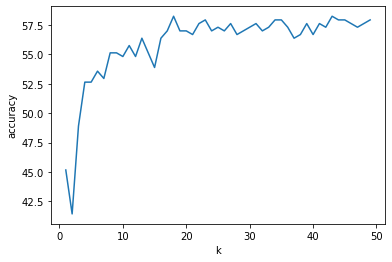

In [135]:
#The optimal number of neighbors was determined as the following code:
knn_list = range(1, 50)
accuracy_scores = []


for k in knn_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    accuracy_scores.append(knn.score(X_test, y_test) *100)
   

plt.plot(knn_list, accuracy_scores)
plt.xlabel('k')
plt.ylabel('accuracy')

In [136]:
#let's check the accuracy:
print("Accuracy: {0:.0f}%".format(knn.score(X_test, y_test) * 100))


#credit from: https://stackoverflow.com/questions/5306756/how-to-print-a-percentage-value-in-python


Accuracy: 58%


In [137]:
#we can see the optimal K in 18:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
y_predictions_knn = knn.predict(X_test)

In [138]:
#Let's create a function to plot the confusion matrix using seaborn
cm=confusion_matrix(y_test, y_predictions_knn)
def confusion_matrix_plot(cm):
    ax= sns.heatmap(cm, annot=True, fmt="d")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Draw', 'Loss','Win'])
    ax.yaxis.set_ticklabels(['Draw', 'Loss','Win'])
    return ax

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted labels', ylabel='True labels'>

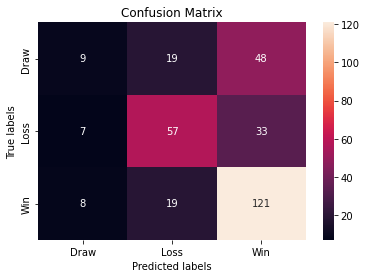

In [139]:
confusion_matrix_plot(cm)

In [140]:
print(classification_report(y_test, y_predictions_knn))

              precision    recall  f1-score   support

        Draw       0.38      0.12      0.18        76
        Loss       0.60      0.59      0.59        97
         Win       0.60      0.82      0.69       148

    accuracy                           0.58       321
   macro avg       0.52      0.51      0.49       321
weighted avg       0.55      0.58      0.54       321



# 05 - Predict the model

# Building my model 
## FIFA World Cup 2022 matches

* For reasons of lack of time I built the matches tables, groups and knockout stages manually, planned to be organized it at code later.  
* FIFA World Cup 2022 matches have been taken from : https://www.sportingnews.com/us/soccer/news/fifa-world-cup-schedule-2022-match-dates-times-team-fixtures/rikum04od4igad8n0o8yanoo

In [70]:

df_worldcup_2022=load_dataset('04 - Machine Learning/worldcup_2022_matches.csv')
df_worldcup_2022

,Group,Home_Team,Away_Team,Year
0,A,Senegal,Netherlands,2022
1,A,Qatar,Ecuador,2022
2,A,Qatar,Senegal,2022
3,A,Netherlands,Ecuador,2022
4,A,Netherlands,Qatar,2022
5,A,Ecuador,Senegal,2022
6,B,England,IR Iran,2022
7,B,United States,Wales,2022
8,B,Wales,IR Iran,2022
9,B,England,United States,2022


In [71]:
#creat df with ranking,points,win and draw precantage for both teams per every match:
def creat_model(df,past):

    worldcup_list = []
    
    for _,row in df.iterrows():
        worldcup_dict={}

        year=row['Year']
        home_team=row['Home_Team']
        away_team=row['Away_Team']
        #dont forget to change current df after merge!!! :
        rankings=get_rankings(df_ranking_rename_teams,home_team,away_team,int(year))
        win_draw_percentages=win_draw_percentage(df_stat_fill_mpwld,home_team,away_team,int(year),past)

        worldcup_dict['Group']=row['Group']
        worldcup_dict['Year']=row['Year']
        worldcup_dict['Home_Team']=home_team
        worldcup_dict['Away_Team']=away_team

        try:
            worldcup_dict['ranking_home_team']=int(rankings['ranking_home_team'])
            worldcup_dict['ranking_away_team']=int(rankings['ranking_away_team'])
            worldcup_dict['Diff Ranking']=int(rankings['ranking_away_team']-rankings['ranking_home_team'])
        except:
            worldcup_dict['ranking_home_team']=rankings['ranking_home_team']
            worldcup_dict['ranking_away_team']=rankings['ranking_away_team']
            worldcup_dict['Diff Ranking']=rankings['ranking_away_team']-rankings['ranking_home_team']


        worldcup_dict['Win_perc_home_team']=win_draw_percentages['win_percentage_home_team']
        worldcup_dict['Win_perc_away_team']=win_draw_percentages['win_percentage_away_team']
        worldcup_dict['Diff_win_perc']=win_draw_percentages['diff_win_percentage']

        worldcup_dict['Draw_perc_home_team']=win_draw_percentages['draw_percentage_home_team']
        worldcup_dict['Draw_perc_away_team']=win_draw_percentages['draw_percentage_away_team']
        worldcup_dict['Diff_draw_perc']=win_draw_percentages['diff_draw_percentage']

        worldcup_dict['Diff_W_D_home_team']=win_draw_percentages['diff_win_draw_home_team']
        worldcup_dict['Diff_W_D_away_team']=win_draw_percentages['diff_win_draw_away_team']


        worldcup_dict['points_home_team']=rankings['points_home_team']
        worldcup_dict['points_away_team']=rankings['points_away_team']

        worldcup_list.append(worldcup_dict)

    return pd.DataFrame(worldcup_list)


In [73]:
df_worldcup_2022_group_model=creat_model(df_worldcup_2022,4)


df_worldcup_2022_group_model.head()

,Group,Year,Home_Team,Away_Team,ranking_home_team,ranking_away_team,Diff Ranking,Win_perc_home_team,Win_perc_away_team,Diff_win_perc,Draw_perc_home_team,Draw_perc_away_team,Diff_draw_perc,Diff_W_D_home_team,Diff_W_D_away_team,points_home_team,points_away_team
0,A,2022,Senegal,Netherlands,18,10,-8,0.599940,0.749813,-0.149873,0.099990,0.000000,0.099990,0.499950,0.749813,1587.78,1653.73
1,A,2022,Qatar,Ecuador,52,44,-8,0.666622,0.000000,0.666622,0.133324,0.499938,-0.366613,0.533298,-0.499938,1437.91,1458.63
2,A,2022,Qatar,Senegal,52,18,-34,0.666622,0.599940,0.066682,0.133324,0.099990,0.033334,0.533298,0.499950,1437.91,1587.78
3,A,2022,Netherlands,Ecuador,10,44,34,0.749813,0.000000,0.749813,0.000000,0.499938,-0.499938,0.749813,-0.499938,1653.73,1458.63
4,A,2022,Netherlands,Qatar,10,52,42,0.749813,0.666622,0.083190,0.000000,0.133324,-0.133324,0.749813,0.533298,1653.73,1437.91


In [ ]:
df_worldcup_2022_group_model.to_csv('04 - Machine Learning\df_worldcup_2022_group_model_29062022.csv',index=False)

In [74]:
#let's predict the model with KNN:
knn.fit(X_train,y_train)

features=['Diff Ranking',
          'Diff_win_perc',
          'Diff_draw_perc',
          'Diff_W_D_home_team','Diff_W_D_away_team',
            'Win_perc_home_team','Win_perc_away_team',
           'Draw_perc_home_team','Draw_perc_away_team',
           'ranking_home_team','ranking_away_team','points_home_team','points_away_team']

X_groups = df_worldcup_2022_model[features]


knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)

pred_groups_2022 = knn.predict(X_groups)
pred_groups_2022

array(['Loss', 'Loss', 'Loss', 'Win', 'Win', 'Loss', 'Win', 'Win', 'Win',
       'Win', 'Loss', 'Loss', 'Win', 'Win', 'Win', 'Win', 'Loss', 'Loss',
       'Win', 'Win', 'Win', 'Win', 'Loss', 'Loss', 'Win', 'Win', 'Win',
       'Win', 'Loss', 'Loss', 'Loss', 'Win', 'Win', 'Win', 'Loss', 'Win',
       'Win', 'Win', 'Loss', 'Win', 'Loss', 'Loss', 'Win', 'Win', 'Win',
       'Win', 'Loss', 'Loss'], dtype=object)

In [76]:
df_worldcup_2022_group_model['Result']=pred_groups_2022
display(df_worldcup_2022_group_model['Result'].value_counts())

Win     29
Loss    19
Name: Result, dtype: int64

In [77]:
df_worldcup_2022_group_model.head()

,Group,Year,Home_Team,Away_Team,ranking_home_team,ranking_away_team,Diff Ranking,Win_perc_home_team,Win_perc_away_team,Diff_win_perc,Draw_perc_home_team,Draw_perc_away_team,Diff_draw_perc,Diff_W_D_home_team,Diff_W_D_away_team,points_home_team,points_away_team,Result
0,A,2022,Senegal,Netherlands,18,10,-8,0.599940,0.749813,-0.149873,0.099990,0.000000,0.099990,0.499950,0.749813,1587.78,1653.73,Loss
1,A,2022,Qatar,Ecuador,52,44,-8,0.666622,0.000000,0.666622,0.133324,0.499938,-0.366613,0.533298,-0.499938,1437.91,1458.63,Loss
2,A,2022,Qatar,Senegal,52,18,-34,0.666622,0.599940,0.066682,0.133324,0.099990,0.033334,0.533298,0.499950,1437.91,1587.78,Loss
3,A,2022,Netherlands,Ecuador,10,44,34,0.749813,0.000000,0.749813,0.000000,0.499938,-0.499938,0.749813,-0.499938,1653.73,1458.63,Win
4,A,2022,Netherlands,Qatar,10,52,42,0.749813,0.666622,0.083190,0.000000,0.133324,-0.133324,0.749813,0.533298,1653.73,1437.91,Win


In [ ]:
df_worldcup_2022_group_model.to_csv('04 - Machine Learning\df_worldcup_2022_score_group_29062022.csv',index=False)


In [78]:
filename=['04 - Machine Learning\groupA_score.csv','04 - Machine Learning\groupB_score.csv','04 - Machine Learning\groupC_score.csv','04 - Machine Learning\groupD_score.csv','04 - Machine Learning\groupE_score.csv',
         '04 - Machine Learning\groupF_score.csv','04 - Machine Learning\groupG_score.csv','04 - Machine Learning\groupH_score.csv']
for df in filename:
    df_group_score=load_dataset(df)
    display(df_group_score)




,Group A,Points
0,Netherlands,9
1,Senegal,3
2,Ecuador,3
3,Qatar,0


,Group B,Points
0,England,9
1,United States,6
2,Wales,3
3,IR Iran,0


,Group C,Points
0,Argentina,9
1,Mexico,6
2,Poland,3
3,Saudi Arabia,0


,Group D,Points
0,France,9
1,Denmark,6
2,Tunisia,3
3,Australia,0


,Group E,Points
0,Spain,9
1,Germany,6
2,Japan,3
3,Costa Rica,0


,Group F,Points
0,Belgium,9
1,Croatia,6
2,Canada,3
3,Morocco,0


,Group G,Points
0,Brazil,9
1,Switzerland,6
2,Serbia,3
3,Cameroon,0


,Group H,Points
0,Portugal,9
1,Uruguay,6
2,South Korea,3
3,Ghana,0


# Next round: Round of 16

## This is a knockout stage, each groups A/C/E/G winner will compete against B/D/F/H runner-up respectively and vice versa:

### 1A vs. 2B	(Netherlands Vs United States)
### 1C vs. 2D	(Argentina Vs Denmark)
### 1D vs. 2C	(France Vs Mexico)
### 1B vs. 2A	(England Vs Senegal)
### 1E vs. 2F	 (Spain Vs Croatia)
### 1G vs. 2H	(Brazil Vs Urugauy)
### 1F vs. 2E	 (Belgium Vs Germany)
### 1H vs. 2G	(Portugal Vs Switzerland)

In [79]:

df_worldcup_round16=load_dataset('04 - Machine Learning/worldcup_2022_round_of_16.csv')
df_worldcup_round16

,Group,Home_Team,Away_Team,Year
0,round of 16,Netherlands,United States,2022
1,round of 16,Argentina,Denmark,2022
2,round of 16,France,Mexico,2022
3,round of 16,England,Senegal,2022
4,round of 16,Spain,Croatia,2022
5,round of 16,Brazil,Uruguay,2022
6,round of 16,Belgium,Germany,2022
7,round of 16,Portugal,Switzerland,2022


In [80]:
df_worldcup_round16_model=creat_model(df_worldcup_round16,4)
df_worldcup_round16_model

,Group,Year,Home_Team,Away_Team,ranking_home_team,ranking_away_team,Diff Ranking,Win_perc_home_team,Win_perc_away_team,Diff_win_perc,Draw_perc_home_team,Draw_perc_away_team,Diff_draw_perc,Diff_W_D_home_team,Diff_W_D_away_team,points_home_team,points_away_team
0,round of 16,2022,Netherlands,United States,10,13,3,0.749813,0.916590,-0.166778,0.000000,0.000000,0.000000,0.749813,0.916590,1653.73,1643.34
1,round of 16,2022,Argentina,Denmark,4,9,5,0.529381,0.399960,0.129421,0.235280,0.299970,-0.064690,0.294100,0.099990,1766.99,1654.54
2,round of 16,2022,France,Mexico,3,12,9,0.636306,0.687457,-0.051151,0.363603,0.124992,0.238611,0.272702,0.562465,1786.15,1647.90
3,round of 16,2022,England,Senegal,5,18,13,0.571388,0.599940,-0.028552,0.214270,0.099990,0.114280,0.357117,0.499950,1755.52,1587.78
4,round of 16,2022,Spain,Croatia,7,15,8,0.299970,0.454504,-0.154534,0.699930,0.272702,0.427228,-0.399960,0.181802,1704.75,1620.74
5,round of 16,2022,Brazil,Uruguay,2,16,14,0.666630,0.571388,0.095242,0.222210,0.285694,-0.063484,0.444420,0.285694,1823.42,1614.05
6,round of 16,2022,Belgium,Germany,1,11,10,0.833264,0.285673,0.547590,0.000000,0.142837,-0.142837,0.833264,0.142837,1828.45,1648.33
7,round of 16,2022,Portugal,Switzerland,8,14,6,0.249969,0.222198,0.027771,0.374953,0.555494,-0.180541,-0.124984,-0.333296,1660.25,1642.83


In [81]:
X_round16 = df_worldcup_round16_model[features]


knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)

pred_round16_2022 = knn.predict(X_round16)
pred_round16_2022

array(['Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win'],
      dtype=object)

In [82]:
df_worldcup_round16_model['Result']=pred_round16_2022
df_worldcup_round16_model

,Group,Year,Home_Team,Away_Team,ranking_home_team,ranking_away_team,Diff Ranking,Win_perc_home_team,Win_perc_away_team,Diff_win_perc,Draw_perc_home_team,Draw_perc_away_team,Diff_draw_perc,Diff_W_D_home_team,Diff_W_D_away_team,points_home_team,points_away_team,Result
0,round of 16,2022,Netherlands,United States,10,13,3,0.749813,0.916590,-0.166778,0.000000,0.000000,0.000000,0.749813,0.916590,1653.73,1643.34,Win
1,round of 16,2022,Argentina,Denmark,4,9,5,0.529381,0.399960,0.129421,0.235280,0.299970,-0.064690,0.294100,0.099990,1766.99,1654.54,Win
2,round of 16,2022,France,Mexico,3,12,9,0.636306,0.687457,-0.051151,0.363603,0.124992,0.238611,0.272702,0.562465,1786.15,1647.90,Win
3,round of 16,2022,England,Senegal,5,18,13,0.571388,0.599940,-0.028552,0.214270,0.099990,0.114280,0.357117,0.499950,1755.52,1587.78,Win
4,round of 16,2022,Spain,Croatia,7,15,8,0.299970,0.454504,-0.154534,0.699930,0.272702,0.427228,-0.399960,0.181802,1704.75,1620.74,Win
5,round of 16,2022,Brazil,Uruguay,2,16,14,0.666630,0.571388,0.095242,0.222210,0.285694,-0.063484,0.444420,0.285694,1823.42,1614.05,Win
6,round of 16,2022,Belgium,Germany,1,11,10,0.833264,0.285673,0.547590,0.000000,0.142837,-0.142837,0.833264,0.142837,1828.45,1648.33,Win
7,round of 16,2022,Portugal,Switzerland,8,14,6,0.249969,0.222198,0.027771,0.374953,0.555494,-0.180541,-0.124984,-0.333296,1660.25,1642.83,Win


## Qualified to quarter-final:
* Netherlands
* Argentina
* France
* England
* Spain
* Brazil
* Belgium
* Portugal

### The following matches will be defined as follows:


* QF1: 1E/2F vs. 1G/2H   (Spain       Vs Brazil)
* QF2: 1A/2B vs. 1C/2D   (Netherlands Vs Argentina)
* QF3: 1F/2E vs. 1H/2G   (Belgium     Vs Portugal)
* QF4: 1B/2A vs. 1D/2C   (England     Vs France)


In [83]:
df_worldcup_quarter=load_dataset('04 - Machine Learning/worldcup_2022_quarter_final.csv')
df_worldcup_quarter

,Group,Home_Team,Away_Team,Year
0,quarter final,Spain,Brazil,2022
1,quarter final,Netherlands,Argentina,2022
2,quarter final,Belgium,Portugal,2022
3,quarter final,England,France,2022


In [84]:
df_worldcup_quarter_model=creat_model(df_worldcup_quarter,4)
df_worldcup_quarter_model

,Group,Year,Home_Team,Away_Team,ranking_home_team,ranking_away_team,Diff Ranking,Win_perc_home_team,Win_perc_away_team,Diff_win_perc,Draw_perc_home_team,Draw_perc_away_team,Diff_draw_perc,Diff_W_D_home_team,Diff_W_D_away_team,points_home_team,points_away_team
0,quarter final,2022,Spain,Brazil,7,2,-5,0.299970,0.666630,-0.366660,0.69993,0.222210,0.477720,-0.399960,0.444420,1704.75,1823.42
1,quarter final,2022,Netherlands,Argentina,10,4,-6,0.749813,0.529381,0.220432,0.00000,0.235280,-0.235280,0.749813,0.294100,1653.73,1766.99
2,quarter final,2022,Belgium,Portugal,1,8,7,0.833264,0.249969,0.583295,0.00000,0.374953,-0.374953,0.833264,-0.124984,1828.45,1660.25
3,quarter final,2022,England,France,5,3,-2,0.571388,0.636306,-0.064918,0.21427,0.363603,-0.149333,0.357117,0.272702,1755.52,1786.15


In [85]:

X_quarter = df_worldcup_quarter_model[features]


knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)

pred_quarter_2022 = knn.predict(X_quarter)
pred_quarter_2022

array(['Win', 'Loss', 'Win', 'Win'], dtype=object)

In [86]:
df_worldcup_quarter_model['Result']=pred_quarter_2022
df_worldcup_quarter_model

,Group,Year,Home_Team,Away_Team,ranking_home_team,ranking_away_team,Diff Ranking,Win_perc_home_team,Win_perc_away_team,Diff_win_perc,Draw_perc_home_team,Draw_perc_away_team,Diff_draw_perc,Diff_W_D_home_team,Diff_W_D_away_team,points_home_team,points_away_team,Result
0,quarter final,2022,Spain,Brazil,7,2,-5,0.299970,0.666630,-0.366660,0.69993,0.222210,0.477720,-0.399960,0.444420,1704.75,1823.42,Win
1,quarter final,2022,Netherlands,Argentina,10,4,-6,0.749813,0.529381,0.220432,0.00000,0.235280,-0.235280,0.749813,0.294100,1653.73,1766.99,Loss
2,quarter final,2022,Belgium,Portugal,1,8,7,0.833264,0.249969,0.583295,0.00000,0.374953,-0.374953,0.833264,-0.124984,1828.45,1660.25,Win
3,quarter final,2022,England,France,5,3,-2,0.571388,0.636306,-0.064918,0.21427,0.363603,-0.149333,0.357117,0.272702,1755.52,1786.15,Win


## Qualified to semi-final:
* Spain
* Argentina
* Belgium
* England

### The following matches will be defined as follows:


* QF1 vs. QF2 (Spain Vs Argentina)
* QF3 vs. QF4 (Belgium Vs England)

In [87]:
df_worldcup_semi=load_dataset('04 - Machine Learning/worldcup_2022_semi_final.csv')
df_worldcup_semi

,Group,Home_Team,Away_Team,Year
0,semi final,Spain,Argentina,2022
1,semi final,Belgium,England,2022


In [88]:
df_worldcup_semi_model=creat_model(df_worldcup_semi,4)
df_worldcup_semi_model

,Group,Year,Home_Team,Away_Team,ranking_home_team,ranking_away_team,Diff Ranking,Win_perc_home_team,Win_perc_away_team,Diff_win_perc,Draw_perc_home_team,Draw_perc_away_team,Diff_draw_perc,Diff_W_D_home_team,Diff_W_D_away_team,points_home_team,points_away_team
0,semi final,2022,Spain,Argentina,7,4,-3,0.299970,0.529381,-0.229411,0.69993,0.23528,0.46465,-0.399960,0.294100,1704.75,1766.99
1,semi final,2022,Belgium,England,1,5,4,0.833264,0.571388,0.261876,0.00000,0.21427,-0.21427,0.833264,0.357117,1828.45,1755.52


In [89]:
X_semi = df_worldcup_semi_model[features]


knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)

pred_semi_2022 = knn.predict(X_semi)
pred_semi_2022

array(['Win', 'Win'], dtype=object)

## Qualified to final:
* Spain
* Belgium

### In addition, we will predict the third palce:
* Argentina Vs England

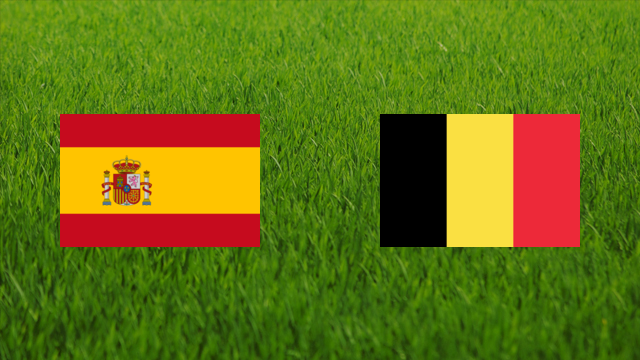

In [90]:
df_worldcup_finals=load_dataset('04 - Machine Learning/worldcup_2022_finals.csv')
df_worldcup_finals

,Group,Home_Team,Away_Team,Year
0,3rd place,Argentina,England,2022
1,final,Spain,Belgium,2022


In [91]:
df_worldcup_finals_model=creat_model(df_worldcup_finals,4)
df_worldcup_finals_model

,Group,Year,Home_Team,Away_Team,ranking_home_team,ranking_away_team,Diff Ranking,Win_perc_home_team,Win_perc_away_team,Diff_win_perc,Draw_perc_home_team,Draw_perc_away_team,Diff_draw_perc,Diff_W_D_home_team,Diff_W_D_away_team,points_home_team,points_away_team
0,3rd place,2022,Argentina,England,4,5,1,0.529381,0.571388,-0.042007,0.23528,0.21427,0.02101,0.29410,0.357117,1766.99,1755.52
1,final,2022,Spain,Belgium,7,1,-6,0.299970,0.833264,-0.533294,0.69993,0.00000,0.69993,-0.39996,0.833264,1704.75,1828.45


In [92]:
X_finals = df_worldcup_finals_model[features]


knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)

pred_finals_2022 = knn.predict(X_finals)
pred_finals_2022

array(['Win', 'Win'], dtype=object)

# And the winner is:
# Spain !
### 2nd place Belgium
### 3rd place Argentina

# Viva España !!!

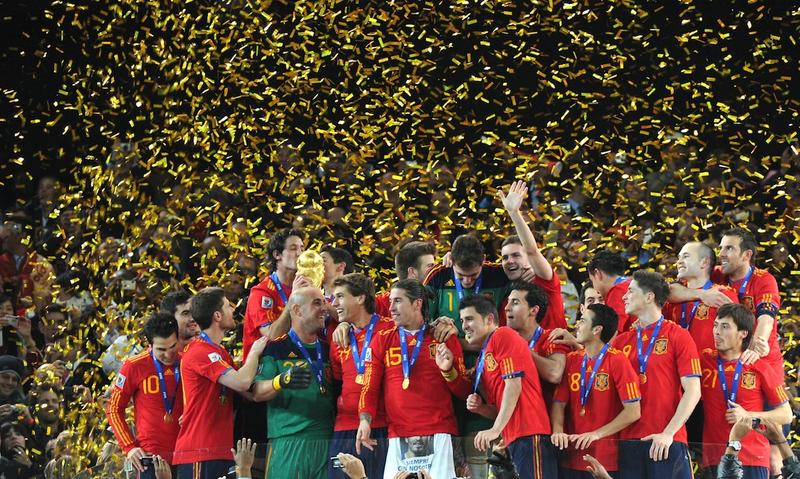

# Conclusions and future work:


* First of all, the course was fun and fascinating, combined with interesting assignments and projects and strengthened my desire to enter the world of data science.Thanks to lecturers and practitioners

* Historical data for 211 FIFA teams and continental tournaments matches were got using BeautifulSoup. It's really beautiful!

* Pandas was used for data cleaning. Pandas is a really powerful library and was key for the development of this project.

* Supervised machine learning algorithm KNN was used for match outcome prediction with accuracy of 58%.

* Future work should include deep analyzing for 'Home advantage' Phenomenon,well-organinzed code for FIFA World Cup group and knockout stages,and more intersting data as players data.

* Updating the ranking data every few month should be take care until the tournament opens. 


